In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
data = loadmat('ex3data1.mat')

x = data['X']
y = data['y']

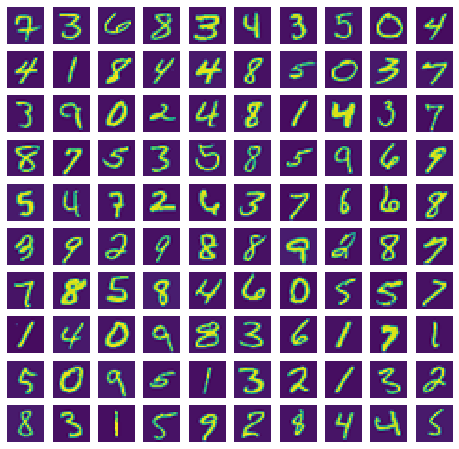

In [4]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8))

for i in range(10):
    for j in range(10):
        axes[i, j].imshow(x[np.random.randint(x.shape[0])].reshape((20, 20), order = 'F'))
        axes[i, j].axis('off')

In [5]:
m = len(x)
ones = np.ones((m, 1))
X = np.hstack((ones, x))
(m, n) = X.shape

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunctionReg(theta, X, y, lmbda):
    y_pred = sigmoid(np.dot(X, theta)) 
    error = (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    regCost = (1/-m) * np.sum(error) + lmbda/(2*m) * np.sum(theta ** 2)
    return regCost

    
def gradientReg(theta, X, y, lmbda):
    y_pred = sigmoid(np.dot(X, theta))
    
    temp = y_pred - y
    temp = 1/m * np.dot(X.T, temp) + theta * (lmbda / m)
    temp[0] = temp[0] - theta[0] * (lmbda / m)
    
    return temp

In [7]:
k = 10
theta = np.zeros((k, n)) #initial parameters

# Set regularization parameter lambda
Lambda = .01

for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i], fprime = gradientReg, 
                           args = (X, (y == digit_class).flatten(), Lambda), maxiter = 50)

         Current function value: 0.004757
         Iterations: 50
         Function evaluations: 176
         Gradient evaluations: 176
         Current function value: 0.011356
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.056325
         Iterations: 50
         Function evaluations: 136
         Gradient evaluations: 136
         Current function value: 0.062207
         Iterations: 50
         Function evaluations: 140
         Gradient evaluations: 140
         Current function value: 0.034374
         Iterations: 50
         Function evaluations: 151
         Gradient evaluations: 151
         Current function value: 0.057767
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.013003
         Iterations: 50
         Function evaluations: 176
         Gradient evaluations: 176
         Current function value: 0.028246
      

In [9]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
acc = np.mean(pred == y.flatten()) * 100

print('Accuracy = '+ str(acc) +' %')

Accuracy = 95.28 %
